In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from scipy.stats import chi2_contingency

In [93]:
df = pd.read_csv('/content/cleaned_data (1).csv')

In [94]:
# Separating features and target
X = df.drop(['target', 'degree'], axis=1)  # Excluding target and degree
y = df['target']

In [95]:
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

In [96]:
rf_model.fit(X, y)
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'RF_Importance': rf_model.feature_importances_
}).sort_values(by='RF_Importance', ascending=False)

In [97]:
xgb_model.fit(X, y)
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'XGB_Importance': xgb_model.feature_importances_
}).sort_values(by='XGB_Importance', ascending=False)

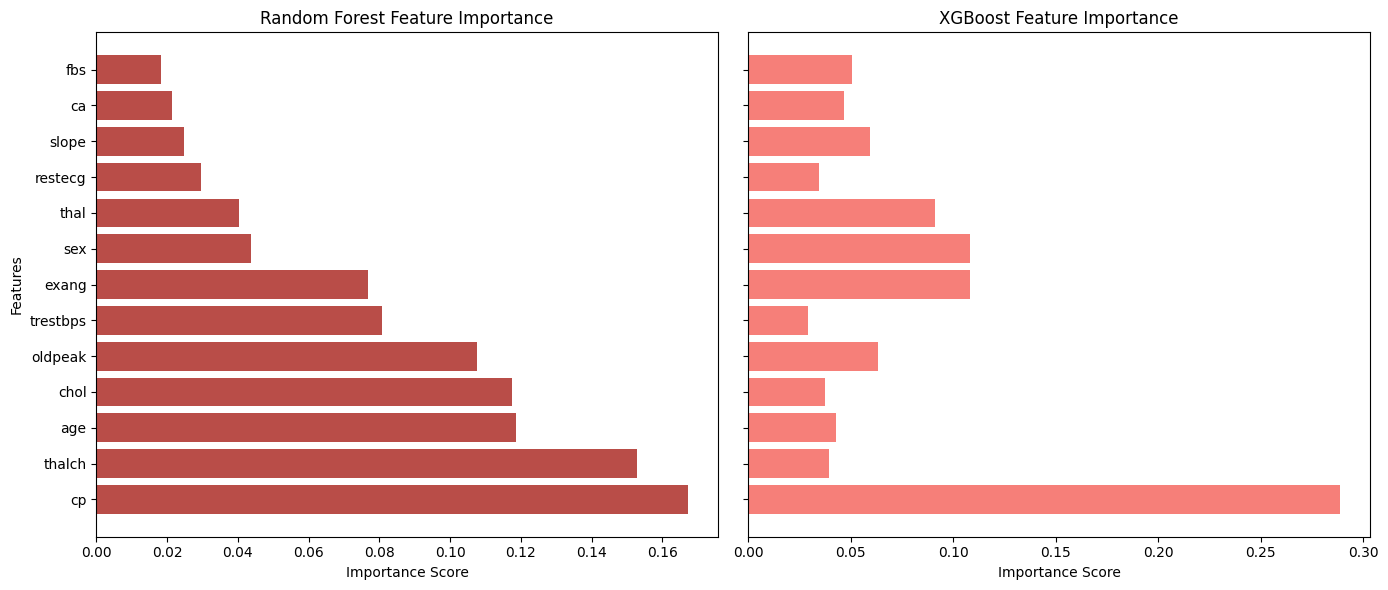

In [98]:
# Step 2: Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Random Forest
ax1.barh(rf_sorted['Feature'], rf_sorted['RF_Importance'], color='#b94d48')
ax1.set_title('Random Forest Feature Importance')
ax1.set_xlabel('Importance Score')
ax1.set_ylabel('Features')
ax1.invert_yaxis()  # Needed to show most important at the top

# XGBoost
ax2.barh(xgb_sorted['Feature'], xgb_sorted['XGB_Importance'], color='#f67f79')
ax2.set_title('XGBoost Feature Importance')
ax2.set_xlabel('Importance Score')
ax2.invert_yaxis()  # Also needed here

plt.tight_layout()
plt.show()


In [99]:
rfe = RFE(estimator=rf_model, n_features_to_select=6)  # Selecting top 6 features
rfe.fit(X, y)
rfe_selected = X.columns[rfe.support_].tolist()

In [100]:
chi2_scores, p_values = chi2(X, y)
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': chi2_scores,
    'P_Value': p_values
}).sort_values(by='Chi2_Score', ascending=False)

In [101]:
significant_features = chi2_results[chi2_results['P_Value'] < 0.05]['Feature'].tolist()

In [102]:
print("Random Forest Feature Importance:")
print(rf_importance)
print("\nXGBoost Feature Importance:")
print(xgb_importance)
print("\nRFE Selected Features:")
print(rfe_selected)
print("\nChi-Square Test Results:")
print(chi2_results)
print("\nSignificant Features (p < 0.05):")
print(significant_features)

Random Forest Feature Importance:
     Feature  RF_Importance
2         cp       0.167360
7     thalch       0.152919
0        age       0.118675
4       chol       0.117521
9    oldpeak       0.107484
3   trestbps       0.080799
8      exang       0.076743
1        sex       0.043835
12      thal       0.040483
6    restecg       0.029660
10     slope       0.024825
11        ca       0.021440
5        fbs       0.018256

XGBoost Feature Importance:
     Feature  XGB_Importance
2         cp        0.288764
8      exang        0.108282
1        sex        0.108252
12      thal        0.091025
9    oldpeak        0.063472
10     slope        0.059232
5        fbs        0.050496
11        ca        0.046786
0        age        0.042917
7     thalch        0.039409
4       chol        0.037503
6    restecg        0.034488
3   trestbps        0.029374

RFE Selected Features:
['age', 'cp', 'trestbps', 'chol', 'thalch', 'oldpeak']

Chi-Square Test Results:
     Feature  Chi2_Score       P_V

In [103]:
relevant_features = list(set(rfe_selected) & set(significant_features))
print("\nMost Relevant Features for Modeling:")
print(relevant_features)


Most Relevant Features for Modeling:
['age', 'oldpeak', 'cp', 'thalch']


In [105]:
selected_features = df[['age', 'oldpeak', 'cp', 'thalch' , 'target' , 'degree']]

In [106]:
selected_features.to_csv('selected_features.csv', index=False)